In [12]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import Column, Integer, String, Float 

In [13]:
import numpy as np
import pandas as pd

In [14]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [15]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [16]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
connect = engine.connect()
Base = automap_base()

In [17]:
# reflect an existing database into a new model
Base.prepare(engine, reflect=True)

# reflect the tables


['measurement', 'station']

In [19]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [20]:
# Save references to each table
measure = Base.classes.measurement
station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [35]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results


NameError: name 'date' is not defined

In [42]:
# Calculate the date 1 year ago from the last data point in the database
last = session.query(measure).order_by(measure.date.desc()).limit(1).all()
last_date = " " 

for info in last:
    last_date = info

print(last_date)

In [44]:
# Perform a query to retrieve the data and precipitation scores
prcp = dt.date(2017,8,23)-dt.timedelta(days=365)
print(prcp)

2016-08-23


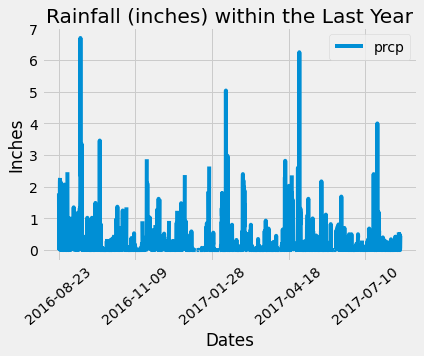

In [50]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_file= session.query(measure.date, measure.prcp).filter(measure.date>= 
                                                                 prcp).all()
# Sort the dataframe by date
prcp_df = pd.DataFrame(prcp_file, columns=['date', 'prcp'])
prcp_df.set_index(['date'], inplace=True)
prcp_final_df = prcp_df.sort_values('date')
prcp_final_df

# Use Pandas Plotting with Matplotlib to plot the data
prcp_final_df.plot(rot=40)
plt.xlabel('Dates')
plt.ylabel('Inches')
plt.title('Rainfall (inches) within the Last Year')
plt.show()

In [51]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_final_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [54]:
# Design a query to show how many stations are available in this dataset?
number_of_stations = session.query(func.count(station.id)).all()
print(f'There are a total of {number_of_stations[0][0]} avaiable stations.')

There are a total of 9 avaiable stations.


In [55]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
stations=session.query(measure.station,func.count(measure.station)).group_by(measure.station).order_by(func.count(measure.station).desc()).all()
stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [57]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
most_active = stations[0][0]
station_data = session.query(measure.tobs).filter(measure.station==most_active).all()
min_temp = session.query(func.min(measure.tobs)).filter(measure.station==most_active).all()
max_temp = session.query(func.max(measure.tobs)).filter(measure.station==most_active).all()
avg_temp = session.query(func.avg(measure.tobs)).filter(measure.station==most_active).all()

print(f'Lowest temp recorded: {min_temp[0][0]}°F')
print(f'Highest temp recorded: {max_temp[0][0]}°F')
print(f'Average temp: {round(avg_temp[0][0],2)}°F')

Lowest temp recorded: 54.0°F
Highest temp recorded: 85.0°F
Average temp: 71.66°F


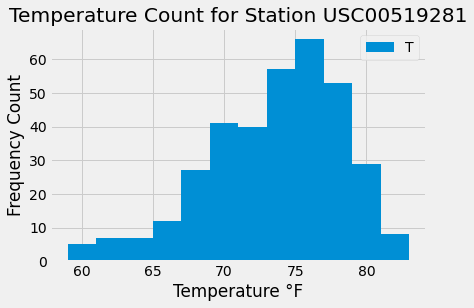

In [60]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
stations = session.query(measure.tobs).filter(measure.station == most_active).filter(measure.date >= prcp).all()

results=[int(info[0]) for info in stations]
plt.hist(results, bins = 12)
plt.xlabel('Temperature °F')
plt.ylabel('Frequency Count')
plt.title(f'Temperature Count for Station {most_active}')
plt.legend('Temperature')
plt.show()

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
